In [ ]:
#Anamoly-Detection-in-Financial-Transactions -Dissertation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Datasets
dataset1 = pd.read_csv('/content/drive/My Drive/Anamoly-Detection-in-Financial-Transactions-Dissertation/Credit-Card-Fraud-Detection-Dataset.csv')
dataset2 = pd.read_csv('/content/drive/My Drive/Anamoly-Detection-in-Financial-Transactions-Dissertation/credi-card-fraud-dataset-trends-and-tactics.csv')

In [ ]:
#Dataset 1 Analyse (EDA)

In [6]:
#color schme
colors = ["#285193", "#ee7d21"]

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Normal percentage is 99.83% 
Fraud percentage is 0.17% 


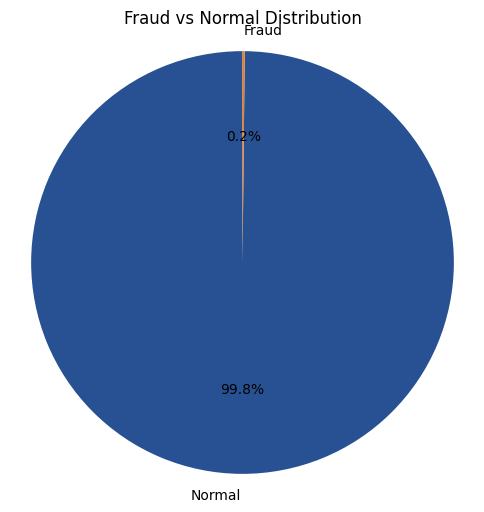

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each class
Count = dataset1["Class"].value_counts()

# Get counts for no fraud and fraud
Normal = Count.get(0, 0)
fraud = Count.get(1, 0)

# Calculate total count
Total_Count = Normal + fraud

# Calculate percentages
Normal_percent = ((Normal / Total_Count) * 100).round(2)
fraud_percent = ((fraud / Total_Count) * 100).round(2)

# Print counts and percentages
print("Class Distribution:")
print(Count)
print(f"\nNormal percentage is {Normal_percent}% ")
print(f"Fraud percentage is {fraud_percent}% ")

# Prepare data for pie chart
percentage_data = [Normal_percent, fraud_percent]
labels = ["Normal", "Fraud"]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentage_data, labels=labels, colors=colors, startangle=90, autopct="%1.1f%%")
plt.title("Fraud vs Normal Distribution")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()


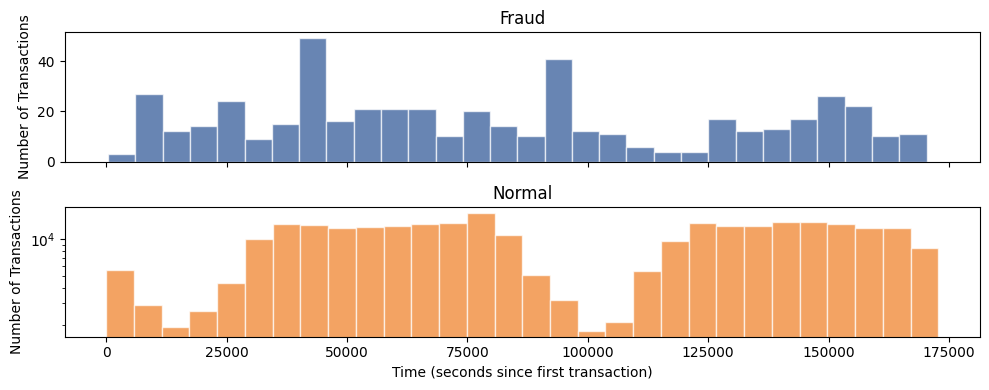

In [8]:
# Create subplots for histograms
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 4))

bins = 30

# Histogram for Fraud transactions
ax1.hist(dataset1.Time[dataset1.Class == 1], bins=bins, color='#285193', alpha=0.7, edgecolor="white")
ax1.set_title("Fraud")
ax1.set_ylabel("Number of Transactions")

# Histogram for Normal transactions
ax2.hist(dataset1.Time[dataset1.Class == 0], bins=bins, color='#ee7d21', alpha=0.7, edgecolor="white")
ax2.set_title("Normal")
ax2.set_ylabel("Number of Transactions")

# Common X-axis label and log scale for better visibility
plt.xlabel("Time (seconds since first transaction)")
plt.yscale("log")
plt.tight_layout()
plt.show()


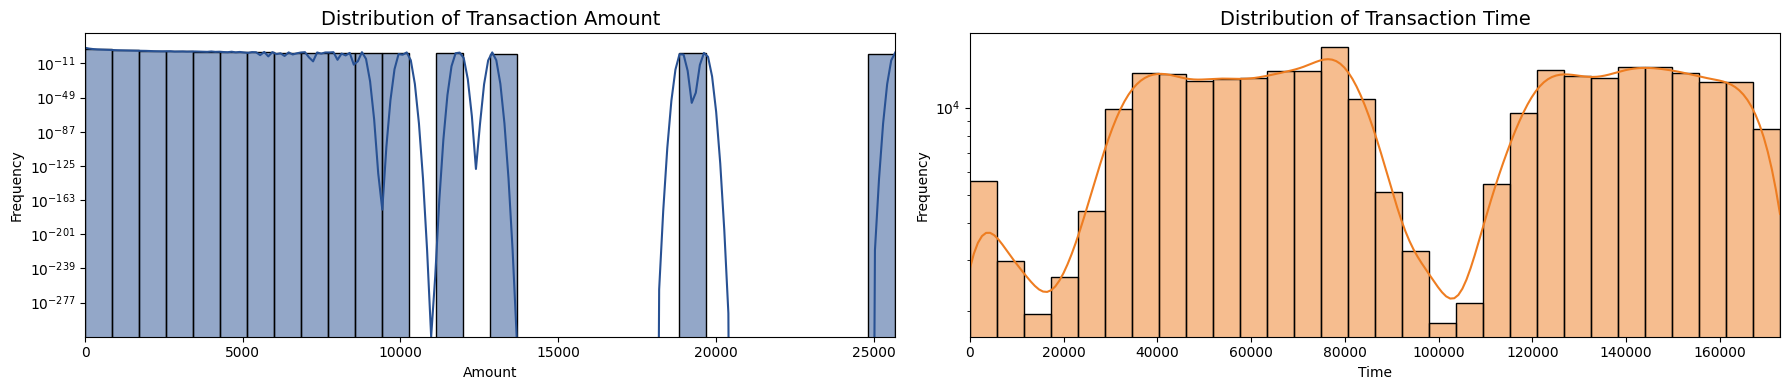

In [9]:
# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Get values for Amount and Time
amount_val = dataset1["Amount"].values
time_val = dataset1["Time"].values

# Plot distribution of Transaction Amount
sns.histplot(amount_val, ax=ax[0], color=colors[0], kde=True, bins=30)
ax[0].set_title("Distribution of Transaction Amount", fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_xlabel("Amount")
ax[0].set_ylabel("Frequency")
ax[0].set_yscale("log")

# Plot distribution of Transaction Time
sns.histplot(time_val, ax=ax[1], color=colors[1], kde=True, bins=30)
ax[1].set_title("Distribution of Transaction Time", fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Frequency")
ax[1].set_yscale("log")

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
#Model Tune with Dataset1



===== Random Forest =====
Accuracy: 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



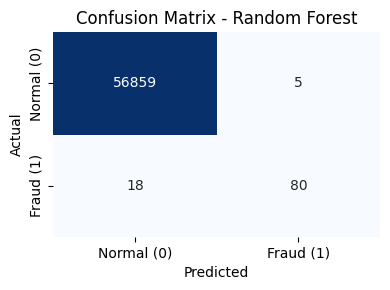



===== Logistic Regression =====
Accuracy: 0.9991

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



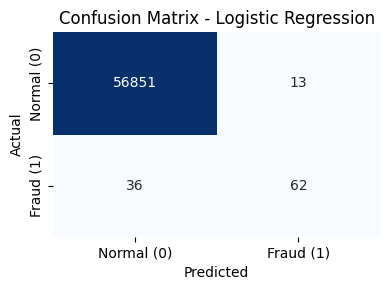



===== SVM =====
Accuracy: 0.9994

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.69      0.80        98

    accuracy                           1.00     56962
   macro avg       0.98      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



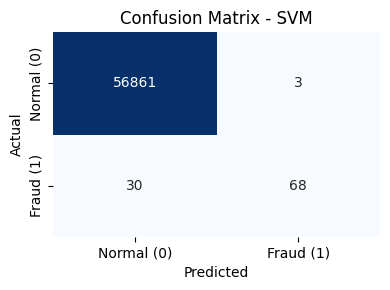



===== Decision Tree =====
Accuracy: 0.9991

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



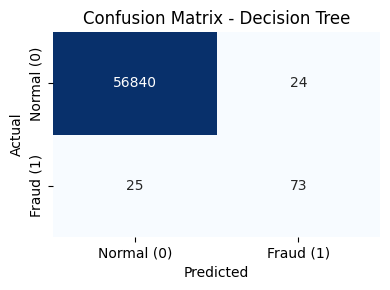



===== KNN =====
Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



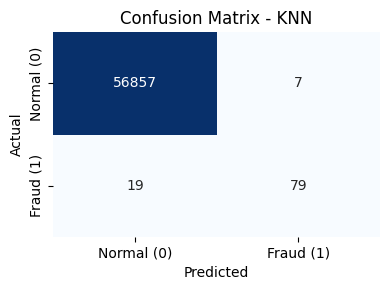



===== Autoencoder =====
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
Accuracy: 0.9470

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.84      0.05        98

    accuracy                           0.95     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.95      0.97     56962



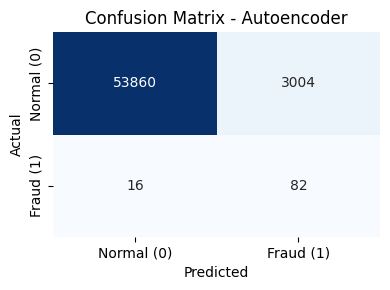

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Load data
data = dataset1.copy()

# Step 2: Split features and target
X = data.drop("Class", axis=1)
y = data["Class"]

# Step 3: Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and Evaluate Traditional Models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\n\n===== {name} =====")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Normal (0)", "Fraud (1)"],
                yticklabels=["Normal (0)", "Fraud (1)"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

# Step 6: Autoencoder Model
print("\n\n===== Autoencoder =====")

# Filter only normal transactions (Class = 0) for training
X_train_normal = X_train_scaled[y_train == 0]

# Define Autoencoder architecture
input_dim = X_train_normal.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train Autoencoder on only normal transactions
autoencoder.fit(X_train_normal, X_train_normal, epochs=20, batch_size=32, shuffle=True, validation_split=0.1, verbose=0)

# Step 7: Calculate Reconstruction Error on Test Set
reconstructions = autoencoder.predict(X_test_scaled)
reconstruction_errors = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)

# Step 8: Determine Threshold using training normal transactions
reconstructions_train = autoencoder.predict(X_train_normal)
train_errors = np.mean(np.power(X_train_normal - reconstructions_train, 2), axis=1)
threshold = np.percentile(train_errors, 95)  # top 5% anomaly assumption

# Step 9: Predict based on reconstruction error
y_pred_autoencoder = (reconstruction_errors > threshold).astype(int)

# Step 10: Evaluation
accuracy = accuracy_score(y_test, y_pred_autoencoder)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_autoencoder))
cm = confusion_matrix(y_test, y_pred_autoencoder)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Normal (0)", "Fraud (1)"],
            yticklabels=["Normal (0)", "Fraud (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Autoencoder")
plt.tight_layout()
plt.show()


In [ ]:
#Dataset 2 Analyse (EDA)

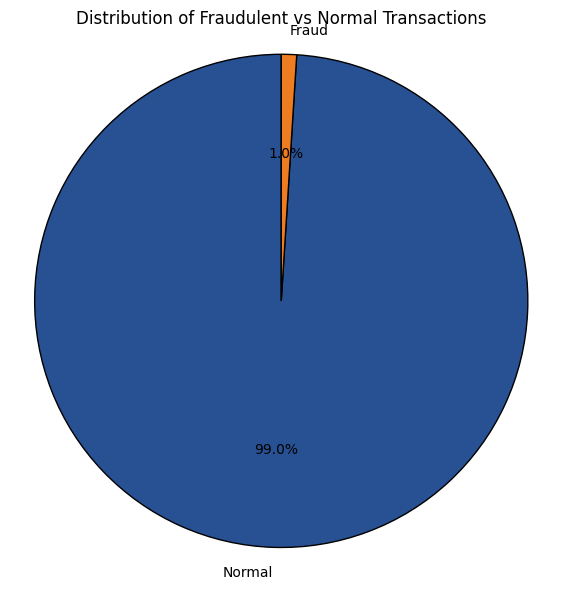

In [ ]:

# Count occurrences of fraud and normal transactions
fraud_count = dataset2['IsFraud'].value_counts()
# Define colors
colors = ['#285193', '#ee7d21']  # Fraudulent (orange), Normal (blue)

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(fraud_count, labels=['Normal', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title of the pie chart
plt.title('Distribution of Fraudulent vs Normal Transactions')

# Equal aspect ratio ensures that pie chart is circular.
plt.axis('equal')

# Show the plot
plt.show()


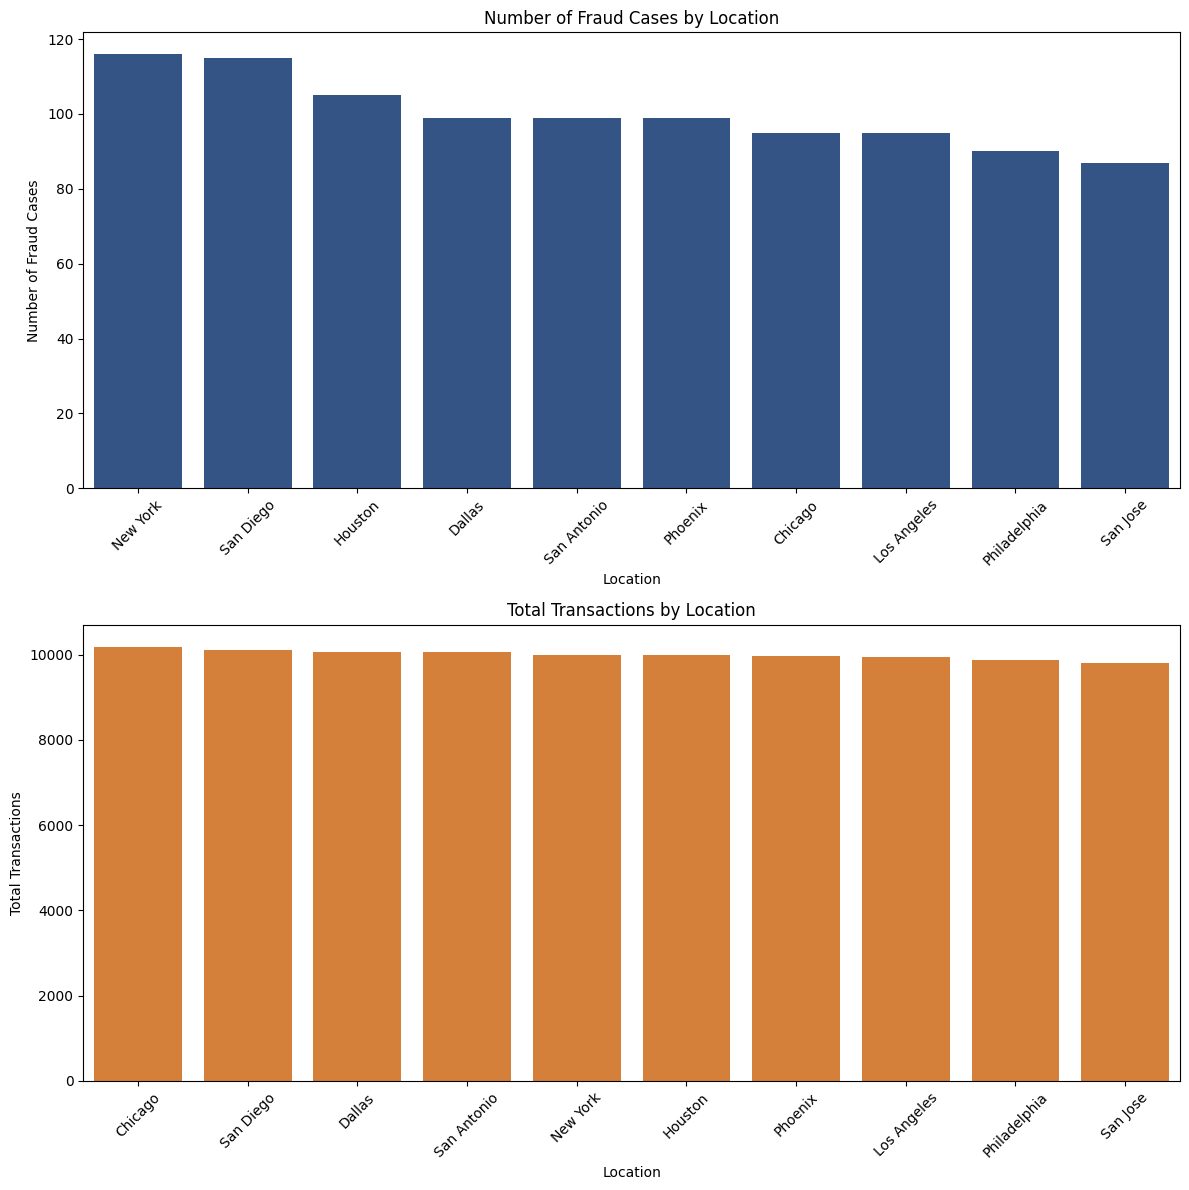

In [ ]:
# Strip column names to avoid key errors
dataset2.columns = dataset2.columns.str.strip()

# Create a 'LocationLabel' column if it doesn't exist
if 'LocationLabel' not in dataset2.columns:
    dataset2['LocationLabel'] = dataset2['Location']

# Define custom color palettes
fraud_colors = ['#285193']  # Blue for fraud
total_transactions_colors = ['#ee7d21']  # Orange for total transactions

# Create the subplots
plt.figure(figsize=(12, 12))

# First subplot: Fraud cases by location
plt.subplot(2, 1, 1)

fraud_by_location = dataset2[dataset2['IsFraud'] == 1].groupby('LocationLabel').size().reset_index(name='FraudCount')
fraud_by_location = fraud_by_location.sort_values(by='FraudCount', ascending=False)

# Create the barplot for fraud cases
sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, color=fraud_colors[0])
plt.title('Number of Fraud Cases by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

# Second subplot: Total transactions by location
plt.subplot(2, 1, 2)

total_transactions_by_location = dataset2.groupby('LocationLabel').size().reset_index(name='TotalTransactions')
total_transactions_by_location = total_transactions_by_location.sort_values(by='TotalTransactions', ascending=False)

# Create the barplot for total transactions
sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, color=total_transactions_colors[0])
plt.title('Total Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


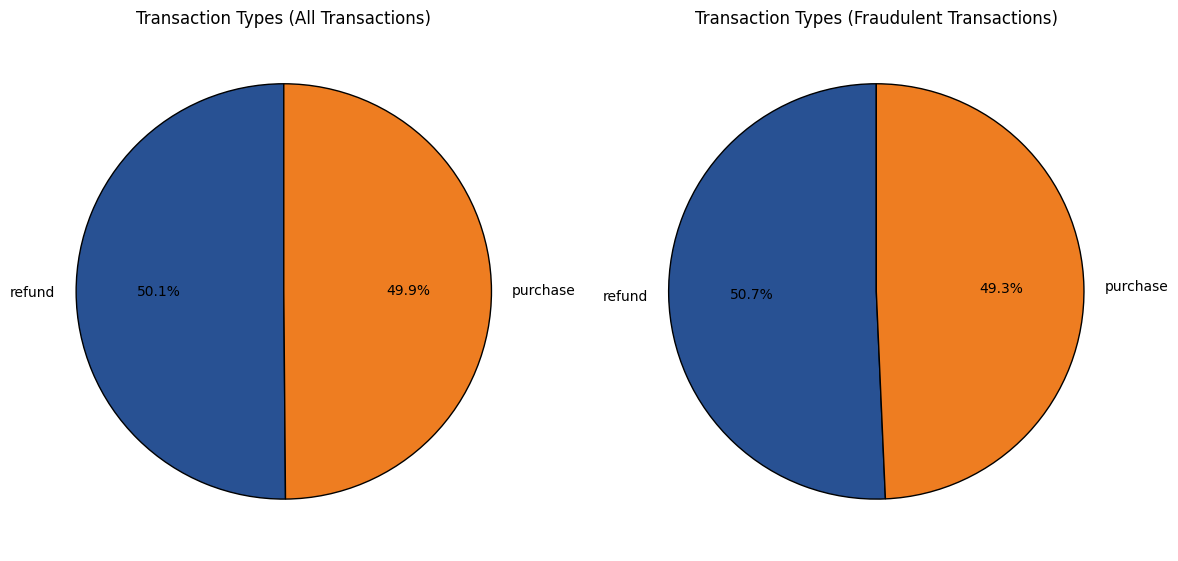

In [ ]:
# Filter fraudulent transactions from dataset2
df_fraud = dataset2[dataset2['IsFraud'] == 1]

# Define custom color theme for 'purchase' and 'refund'
colors = ['#285193', '#ee7d21']  # ['purchase', 'refund']

# Create subplots for Transaction Type Distribution
plt.figure(figsize=(12, 6))

# Pie chart for all transactions
plt.subplot(1, 2, 1)
plt.pie(dataset2['TransactionType'].value_counts().values,
        labels=dataset2['TransactionType'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'})
plt.title('Transaction Types (All Transactions)')

# Pie chart for fraud-only transactions
plt.subplot(1, 2, 2)
plt.pie(df_fraud['TransactionType'].value_counts().values,
        labels=df_fraud['TransactionType'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'})
plt.title('Transaction Types (Fraudulent Transactions)')

plt.tight_layout()
plt.show()


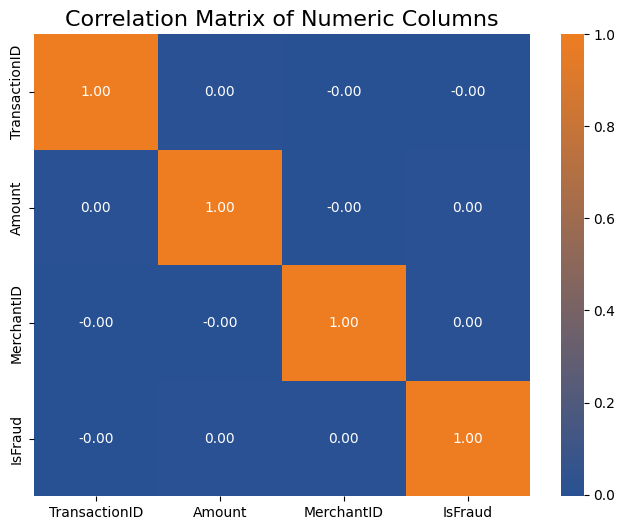

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Filter out non-numeric columns from the dataset
numeric_data = dataset2.select_dtypes(include=[float, int])

# Compute the correlation matrix only for numeric data
correlation = numeric_data.corr()

# Create a custom colormap from your specified colors
colors = ["#285193", "#ee7d21"]  # Define your colors
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap=cmap, fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns', fontsize=16)
plt.show()


In [ ]:
#Dataset 2 model tune



===== Random Forest =====
Accuracy: 0.9900

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


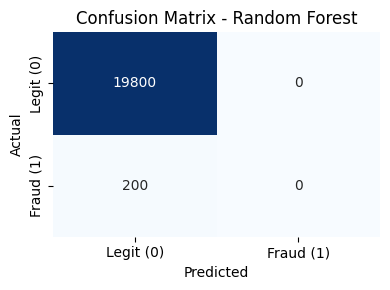



===== Logistic Regression =====
Accuracy: 0.9900

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


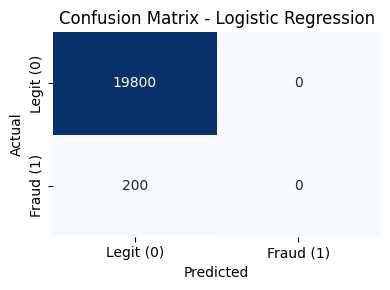



===== SVM =====
Accuracy: 0.9900

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


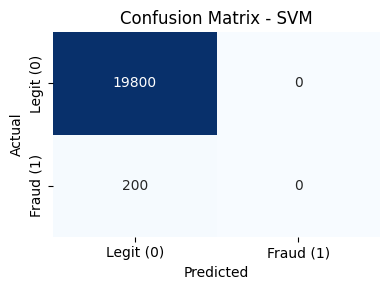



===== Decision Tree =====
Accuracy: 0.9791

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19800
           1       0.01      0.01      0.01       200

    accuracy                           0.98     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.98      0.98      0.98     20000



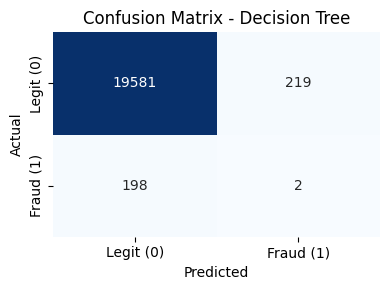



===== KNN =====
Accuracy: 0.9899

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000



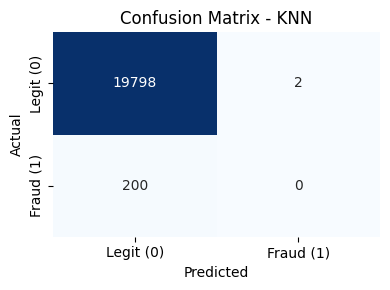



===== Autoencoder =====
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2475/2475 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.9413

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     19800
           1       0.01      0.05      0.02       200

    accuracy                           0.94     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.98      0.94      0.96     20000



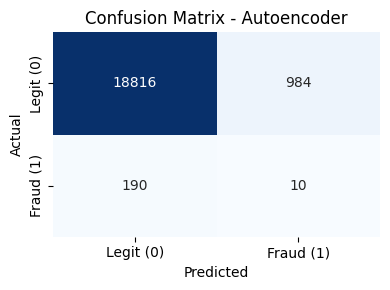

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load dataset2
dataset2 = pd.read_csv('/content/drive/My Drive/Anamoly-Detection-in-Financial-Transactions-Dissertation/credi-card-fraud-dataset-trends-and-tactics.csv')

# Drop TransactionID and TransactionDate (non-numeric)
dataset2 = dataset2.drop(['TransactionID', 'TransactionDate'], axis=1)

# Encode categorical variables (Location, TransactionType, MerchantID)
le_location = LabelEncoder()
dataset2['Location'] = le_location.fit_transform(dataset2['Location'])

le_type = LabelEncoder()
dataset2['TransactionType'] = le_type.fit_transform(dataset2['TransactionType'])

le_merchant = LabelEncoder()
dataset2['MerchantID'] = le_merchant.fit_transform(dataset2['MerchantID'])

# Separate features and target
X = dataset2.drop('IsFraud', axis=1)
y = dataset2['IsFraud']

# Train-test split (stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Traditional models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\n\n===== {name} =====")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Legit (0)", "Fraud (1)"],
                yticklabels=["Legit (0)", "Fraud (1)"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

# Autoencoder
print("\n\n===== Autoencoder =====")

X_train_normal = X_train_scaled[y_train == 0]

# Autoencoder architecture
input_dim = X_train_normal.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train on only normal transactions
autoencoder.fit(X_train_normal, X_train_normal, epochs=20, batch_size=32, shuffle=True, validation_split=0.1, verbose=0)

# Predictions
reconstructions = autoencoder.predict(X_test_scaled)
reconstruction_errors = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)

reconstructions_train = autoencoder.predict(X_train_normal)
train_errors = np.mean(np.power(X_train_normal - reconstructions_train, 2), axis=1)
threshold = np.percentile(train_errors, 95)

y_pred_autoencoder = (reconstruction_errors > threshold).astype(int)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_autoencoder)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_autoencoder))
cm = confusion_matrix(y_test, y_pred_autoencoder)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legit (0)", "Fraud (1)"],
            yticklabels=["Legit (0)", "Fraud (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Autoencoder")
plt.tight_layout()
plt.show()
